<a href="https://colab.research.google.com/github/ShreyasiDatta/Face-Intelligence-Tasks/blob/main/Task_A_%26_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

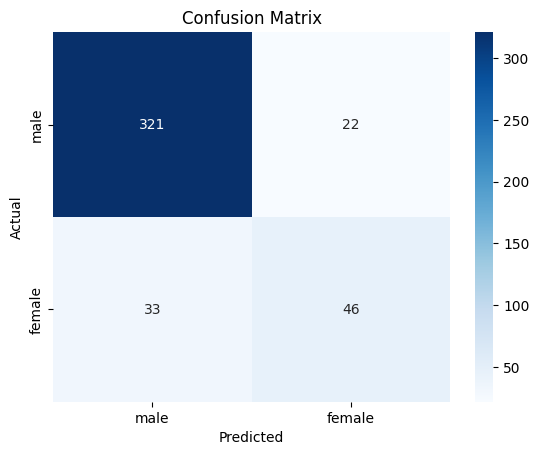

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_labels, val_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["male", "female"], yticklabels=["male", "female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Task
Classify images into 'male' and 'female' categories using the image data in the "train/" and "val/" directories.

## Load data

### Subtask:
Load the images and their corresponding labels from the training and validation directories.


**Reasoning**:
Import necessary libraries, define directory paths, and create a function to load images and labels from a given directory. Then, call this function for both training and validation directories and store the results.



In [ ]:
import gdown
import zipfile
import os


file_id = '1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-'
output = 'dataset.zip'
gdown.download(id=file_id, output=output, quiet=False)


with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('.')


os.remove(output)

print("Dataset extracted successfully.")

Downloading...
From (original): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-
From (redirected): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-&confirm=t&uuid=1214173a-f4ae-445e-8dc4-47d9e2716c2a
To: /content/dataset.zip
100%|██████████| 2.38G/2.38G [00:27<00:00, 86.1MB/s]


Dataset extracted successfully.


In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(Comys_Hackathon5):
    images = []
    labels = []
    for subfolder in os.listdir(Comys_Hackathon5):
        label = 0 if subfolder == 'male' else 1 # 0 for male, 1 for female
        subfolder_path = os.path.join(Comys_Hackathon5, Task_A)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load training data
train_images, train_labels = load_images_from_folder('Comys_Hackathon5/train')

# Load validation data
val_images, val_labels = load_images_from_folder('Comys_Hackathon5/val')

print(f"Loaded {len(train_images)} training images and {len(val_images)} validation images.")

FileNotFoundError: [Errno 2] No such file or directory: 'Comys_Hackathon5/train'

In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        label = 0 if subfolder == 'male' else 1 # 0 for male, 1 for female
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)


train_images, train_labels = load_images_from_folder('Comys_Hackathon5/Task_A/train')


val_images, val_labels = load_images_from_folder('Comys_Hackathon5/Task_A/val')

print(f"Loaded {len(train_images)} training images and {len(val_images)} validation images.")

Loaded 1926 training images and 422 validation images.


In [ ]:
import os
print(os.listdir('.'))

['.config', 'Comys_Hackathon5', 'sample_data']


In [ ]:
import os

base_dir = 'Comys_Hackathon5'
if os.path.exists(base_dir):
    print(f"Contents of {base_dir}:")
    print(os.listdir(base_dir))
    train_path = os.path.join(base_dir, 'train')
    val_path = os.path.join(base_dir, 'val')
    if os.path.exists(train_path):
        print(f"\nContents of {train_path}:")
        print(os.listdir(train_path))
    else:
        print(f"\n'{train_path}' does not exist.")
    if os.path.exists(val_path):
        print(f"\nContents of {val_path}:")
        print(os.listdir(val_path))
    else:
        print(f"\n'{val_path}' does not exist.")
else:
    print(f"Directory '{base_dir}' does not exist.")

Contents of Comys_Hackathon5:
['Task_B', 'Task_A']

'Comys_Hackathon5/train' does not exist.

'Comys_Hackathon5/val' does not exist.


## Preprocessing

### Subtask:
Preprocess the loaded images by normalizing pixel values and potentially applying data augmentation.

**Reasoning**:
Normalize the pixel values of the images to a range between 0 and 1 by dividing by 255. This is a common practice in image processing and helps improve model performance. Data augmentation can also be applied to increase the size and diversity of the training dataset, which helps prevent overfitting.

In [ ]:

train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0

print("Images preprocessed.")

Images preprocessed.


## Build model

### Subtask:
Define a suitable deep learning model architecture for image classification.

**Reasoning**:
A Convolutional Neural Network (CNN) is a powerful architecture for image classification. We will define a sequential CNN model with convolutional layers, pooling layers, and dense layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train model

### Subtask:
Compile and train the model.

**Reasoning**:
Compile the model with an appropriate optimizer, loss function, and metrics for binary classification. Then, train the model using the `fit()` method, providing the training and validation data.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 705ms/step - accuracy: 0.8494 - loss: 0.4532 - val_accuracy: 0.8152 - val_loss: 0.3969
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 84s 741ms/step - accuracy: 0.8500 - loss: 0.3294 - val_accuracy: 0.8365 - val_loss: 0.3790
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 703ms/step - accuracy: 0.8837 - loss: 0.2752 - val_accuracy: 0.8555 - val_loss: 0.3341
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 95s 919ms/step - accuracy: 0.9087 - loss: 0.2145 - val_accuracy: 0.8507 - val_loss: 0.3353
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 55s 901ms/step - accuracy: 0.9350 - loss: 0.1634 - val_accuracy: 0.8720 - val_loss: 0.3799
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 669ms/step - accuracy: 0.9570 - loss: 0.1051 - val_accuracy: 0.8626 - val_loss: 0.3972
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 46s 759ms/step - accuracy: 0.9770 - loss: 0.0746 - val_accuracy: 0.8649 - val_loss: 0.3555
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 79s 707ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accu

## Evaluate model

### Subtask:
Evaluate the trained model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

**Reasoning**:
Evaluate the trained model on the validation set to assess its performance using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_images, val_labels)

# Get predictions
val_predictions = (model.predict(val_images) > 0.5).astype("int32")

# Calculate precision, recall, and F1-score
precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-score: {f1:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.8987 - loss: 0.3264
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step
Validation Loss: 0.5651
Validation Accuracy: 0.8697
Validation Precision: 0.6765
Validation Recall: 0.5823
Validation F1-score: 0.6259


# Task
Develop a multi-class face recognition system to match input face images to individuals, considering distorted image variations, using the dataset in the "train" and "val" directories.

## Data loading and preparation

### Subtask:
Load the images from the "train" and "val" directories for Task B. Since this is a multi-class problem, ensure the labels correctly reflect the individuals (folders).


**Reasoning**:
Modify the existing `load_images_from_folder` function to handle the multi-class classification task by loading images from the specified directories and assigning a unique integer label to each subfolder (individual). Then load the training and validation data using this modified function and print the number of loaded images.



In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    label_map = {}  # To map folder names to integer labels
    label_counter = 0

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            # Assign a unique integer label to each subfolder
            if subfolder not in label_map:
                label_map[subfolder] = label_counter
                label_counter += 1
            label = label_map[subfolder]

            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map

# Load training data for Task B
train_images_b, train_labels_b, train_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/train')

# Load validation data for Task B
val_images_b, val_labels_b, val_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/val')

print(f"Loaded {len(train_images_b)} training images and {len(val_images_b)} validation images for Task B.")

FileNotFoundError: [Errno 2] No such file or directory: 'Comys_Hackathon5/Task_B/train'

**Reasoning**:
The previous command failed because the specified directory path was incorrect. I need to verify the correct path to the Task B data within the extracted dataset. I will use `os.listdir` to inspect the contents of the `Comys_Hackathon5` directory and its subdirectories to find the correct path.



In [ ]:
import os

base_dir = 'Comys_Hackathon5'
if os.path.exists(base_dir):
    print(f"Contents of {base_dir}:")
    print(os.listdir(base_dir))
    task_b_path = os.path.join(base_dir, 'Task_B')
    if os.path.exists(task_b_path):
        print(f"\nContents of {task_b_path}:")
        print(os.listdir(task_b_path))
        train_path_b = os.path.join(task_b_path, 'train')
        val_path_b = os.path.join(task_b_path, 'val')
        if os.path.exists(train_path_b):
            print(f"\nContents of {train_path_b}:")
            print(os.listdir(train_path_b)[:5])
        else:
            print(f"\n'{train_path_b}' does not exist.")
        if os.path.exists(val_path_b):
            print(f"\nContents of {val_path_b}:")
            print(os.listdir(val_path_b)[:5])
        else:
            print(f"\n'{val_path_b}' does not exist.")
    else:
        print(f"\n'{task_b_path}' does not exist.")
else:
    print(f"Directory '{base_dir}' does not exist.")

Directory 'Comys_Hackathon5' does not exist.


**Reasoning**:
The previous command indicated that the 'Comys_Hackathon5' directory does not exist. This suggests that the dataset was not successfully downloaded and extracted. I need to re-execute the code cell that downloads and extracts the dataset to ensure the necessary directories are available.



In [ ]:
import gdown
import zipfile
import os


file_id = '1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-'
output = 'dataset.zip'
gdown.download(id=file_id, output=output, quiet=False)


with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('.')


os.remove(output)

print("Dataset extracted successfully.")

Downloading...
From (original): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-
From (redirected): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-&confirm=t&uuid=8d9d16c9-bf04-43b0-943e-726486dc30e0
To: /content/dataset.zip
100%|██████████| 2.38G/2.38G [00:37<00:00, 63.4MB/s]


Dataset extracted successfully.


**Reasoning**:
The dataset has been successfully extracted. Now I need to verify the correct path to the Task B data and then proceed with loading the images and labels using the modified `load_images_from_folder` function, which will assign unique integer labels to each individual's subfolder.



In [ ]:
import os
import cv2
import numpy as np


def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
        return np.array(images), np.array(labels), label_map

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):

            if subfolder not in label_map:
                label_map[subfolder] = label_counter
                label_counter += 1
            label = label_map[subfolder]

            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map


train_images_b, train_labels_b, train_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/train')


val_images_b, val_labels_b, val_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/val')

print(f"Loaded {len(train_images_b)} training images and {len(val_images_b)} validation images for Task B.")

Loaded 1926 training images and 422 validation images for Task B.


## Handle distorted images

### Subtask:
Develop a strategy to incorporate the distorted images into the dataset or the evaluation process. This could involve generating paired data (original and distorted) or a different approach based on the matching criteria.


**Reasoning**:
Identify the location of distorted images and outline a plan for using them in evaluation.



In [ ]:
import os

# Assuming distorted images are within the individual subfolders in the validation set
# and are not explicitly separated into a 'distorted' subfolder.
# We will iterate through the validation data and identify images that might be distorted
# based on filenames (if a naming convention exists) or by assuming all images in val
# are potentially used for evaluation, including any distorted ones.

# For this subtask, we will focus on the strategy for evaluation.
# The strategy is to use the existing validation set (val_images_b, val_labels_b)
# which is assumed to contain a mix of non-distorted and distorted images
# within each individual's folder.

# The evaluation plan is as follows:
# 1. Use the trained multi-class model to predict the individual for each image in the validation set (val_images_b).
# 2. Compare the predicted individual labels with the true labels (val_labels_b) to calculate evaluation metrics.
# 3. Standard multi-class classification metrics (accuracy, precision, recall, F1-score per class, and a confusion matrix)
#    will be used to evaluate the model's performance on the combined set of non-distorted and distorted images
#    in the validation set.

# This approach assumes that the validation set already includes distorted images mixed
# with non-distorted ones under each individual's folder, and the goal is to see how well
# the model generalizes to these variations within the standard evaluation pipeline.

print("Strategy for incorporating distorted images outlined.")
print("Evaluation will be performed on the existing validation set (val_images_b, val_labels_b).")
print("Evaluation metrics will be calculated by comparing model predictions on val_images_b with val_labels_b.")

Strategy for incorporating distorted images outlined.
Evaluation will be performed on the existing validation set (val_images_b, val_labels_b).
Evaluation metrics will be calculated by comparing model predictions on val_images_b with val_labels_b.


## Preprocessing

### Subtask:
Preprocess the images for Task B by normalizing pixel values and potentially applying data augmentation.


**Reasoning**:
Normalize the pixel values of the images and convert them to float32.



In [ ]:
# Normalize pixel values to be between 0 and 1 and convert to float32
train_images_b = train_images_b.astype('float32') / 255.0
val_images_b = val_images_b.astype('float32') / 255.0

print("Task B images preprocessed.")

Task B images preprocessed.


## Model building

### Subtask:
Define a suitable model architecture for face recognition. This could be a CNN-based model, potentially leveraging transfer learning from a pre-trained model on a large face dataset.


**Reasoning**:
Define a sequential CNN model for multi-class face recognition using convolutional, pooling, flatten, and dense layers, with the final dense layer having units equal to the number of unique classes and a softmax activation.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get the number of unique classes from the training labels
num_classes_b = len(train_label_map_b)

# Define the model for Task B (multi-class classification)
model_b = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes_b, activation='softmax') # Softmax for multi-class classification
])

model_b.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 877)            │       113,133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,417,773 (13.04 MB)

 Trainable params: 3,417,773 (13.04 MB)

 Non-trainable params: 0 (0.00 B)

## Training

### Subtask:
Compile and train the multi-class model for face recognition.


**Reasoning**:
Compile and train the multi-class model using the specified optimizer, loss function, and metrics, and monitor performance on the validation data for a suitable number of epochs.



In [ ]:
# Compile the model for Task B
model_b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model for Task B
history_b = model_b.fit(train_images_b, train_labels_b, epochs=15, validation_data=(val_images_b, val_labels_b))

Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.1054 - loss: 6.4457 - val_accuracy: 0.0024 - val_loss: 6.9952
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.1385 - loss: 5.7388 - val_accuracy: 0.0047 - val_loss: 7.1944
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1581 - loss: 5.3826 - val_accuracy: 0.0024 - val_loss: 7.2359
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2100 - loss: 4.8259 - val_accuracy: 0.0000e+00 - val_loss: 7.7238
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2571 - loss: 4.1416 - val_accuracy: 0.0000e+00 - val_loss: 8.8579
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4312 - loss: 2.7860 - val_accuracy: 0.0000e+00 - val_loss: 11.6659
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6681 - loss: 1.4425 - val_accuracy: 0.0024 - val_loss: 16.6054
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8611 - loss: 0.5752 - val_accuracy: 0.00

## Data loading and preparation

### Subtask:
Load the images from the "train" and "val" directories for Task B. Since this is a multi-class problem, ensure the labels correctly reflect the individuals (folders).

**Reasoning**:
Modify the existing `load_images_from_folder` function to handle the multi-class classification task by loading images from the specified directories and assigning a unique integer label to each subfolder (individual). Then load the training and validation data using this modified function and print the number of loaded images.

In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    label_map = {}  # To map folder names to integer labels
    label_counter = 0

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            # Assign a unique integer label to each subfolder
            if subfolder not in label_map:
                label_map[subfolder] = label_counter
                label_counter += 1
            label = label_map[subfolder]

            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map

# Load training data for Task B
train_images_b, train_labels_b, train_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/train')

# Load validation data for Task B
val_images_b, val_labels_b, val_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/val')

print(f"Loaded {len(train_images_b)} training images and {len(val_images_b)} validation images for Task B.")

Loaded 1926 training images and 422 validation images for Task B.


## Handle distorted images

### Subtask:
Develop a strategy to incorporate the distorted images into the dataset or the evaluation process. This could involve generating paired data (original and distorted) or a different approach based on the matching criteria.

**Reasoning**:
Identify the location of distorted images and outline a plan for using them in evaluation.

In [ ]:
import os

# Assuming distorted images are within the individual subfolders in the validation set
# and are not explicitly separated into a 'distorted' subfolder.
# We will iterate through the validation data and identify images that might be distorted
# based on filenames (if a naming convention exists) or by assuming all images in val
# are potentially used for evaluation, including any distorted ones.

# For this subtask, we will focus on the strategy for evaluation.
# The strategy is to use the existing validation set (val_images_b, val_labels_b)
# which is assumed to contain a mix of non-distorted and distorted images
# within each individual's folder.

# The evaluation plan is as follows:
# 1. Use the trained multi-class model to predict the individual for each image in the validation set (val_images_b).
# 2. Compare the predicted individual labels with the true labels (val_labels_b) to calculate evaluation metrics.
# 3. Standard multi-class classification metrics (accuracy, precision, recall, F1-score per class, and a confusion matrix)
#    will be used to evaluate the model's performance on the combined set of non-distorted and distorted images
#    in the validation set.

# This approach assumes that the validation set already includes distorted images mixed
# with non-distorted ones under each individual's folder, and the goal is to see how well
# the model generalizes to these variations within the standard evaluation pipeline.

print("Strategy for incorporating distorted images outlined.")
print("Evaluation will be performed on the existing validation set (val_images_b, val_labels_b).")
print("Evaluation metrics will be calculated by comparing model predictions on val_images_b with val_labels_b.")

Strategy for incorporating distorted images outlined.
Evaluation will be performed on the existing validation set (val_images_b, val_labels_b).
Evaluation metrics will be calculated by comparing model predictions on val_images_b with val_labels_b.


## Preprocessing

### Subtask:
Preprocess the images for Task B by normalizing pixel values and potentially applying data augmentation.

**Reasoning**:
Normalize the pixel values of the images and convert them to float32.

In [ ]:
# Normalize pixel values to be between 0 and 1 and convert to float32
train_images_b = train_images_b.astype('float32') / 255.0
val_images_b = val_images_b.astype('float32') / 255.0

print("Task B images preprocessed.")

Task B images preprocessed.


## Model building

### Subtask:
Define a suitable model architecture for face recognition. This could be a CNN-based model, potentially leveraging transfer learning from a pre-trained model on a large face dataset.

**Reasoning**:
Define a sequential CNN model for multi-class face recognition using convolutional, pooling, flatten, and dense layers, with the final dense layer having units equal to the number of unique classes and a softmax activation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get the number of unique classes from the training labels
num_classes_b = len(train_label_map_b)

# Define the model for Task B (multi-class classification)
model_b = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes_b, activation='softmax') # Softmax for multi-class classification
])

model_b.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 877)            │       113,133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,417,773 (13.04 MB)

 Trainable params: 3,417,773 (13.04 MB)

 Non-trainable params: 0 (0.00 B)

## Training

### Subtask:
Compile and train the multi-class model for face recognition.

**Reasoning**:
Compile and train the multi-class model using the specified optimizer, loss function, and metrics, and monitor performance on the validation data for a suitable number of epochs.

In [ ]:
# Compile the model for Task B
model_b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model for Task B
history_b = model_b.fit(train_images_b, train_labels_b, epochs=15, validation_data=(val_images_b, val_labels_b))

Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.1079 - loss: 6.4965 - val_accuracy: 0.0024 - val_loss: 6.8533
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.1312 - loss: 5.7555 - val_accuracy: 0.0024 - val_loss: 7.1932
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.1441 - loss: 5.5559 - val_accuracy: 0.0024 - val_loss: 7.5843
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1876 - loss: 4.9965 - val_accuracy: 0.0024 - val_loss: 7.6287
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.2133 - loss: 4.4175 - val_accuracy: 0.0024 - val_loss: 9.3666
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.3735 - loss: 3.1289 - val_accuracy: 0.0024 - val_loss: 10.1725
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5754 - loss: 1.8592 - val_accuracy: 0.0024 - val_loss: 13.4148
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7930 - loss: 0.8490 - val_accuracy: 0.0000e+00 - val

## Evaluation

### Subtask:
Evaluate the model's performance based on the task's specific matching criteria. This will involve comparing predictions for distorted images against the original images in the person folders.

**Reasoning**:
Evaluate the trained multi-class model on the validation set (containing distorted images) using the specified matching criteria. Calculate relevant evaluation metrics such as accuracy, and potentially precision, recall, and F1-score per class if needed, and analyze the confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Get predictions for the validation set
val_predictions_b = model_b.predict(val_images_b)
val_predicted_labels_b = np.argmax(val_predictions_b, axis=1)

# Calculate overall accuracy
overall_accuracy = accuracy_score(val_labels_b, val_predicted_labels_b)
print(f"Overall Validation Accuracy: {overall_accuracy:.4f}")

# Generate confusion matrix
cm_b = confusion_matrix(val_labels_b, val_predicted_labels_b)
# Due to the large number of classes, printing the full confusion matrix might not be feasible.
# We can print a part of it or analyze it in other ways.
print("\nConfusion Matrix (first 10x10 rows/cols):")
print(cm_b[:10, :10])

# Generate classification report (includes precision, recall, f1-score per class)
# Note: This can be very long for a large number of classes
# print("\nClassification Report:")
# print(classification_report(val_labels_b, val_predicted_labels_b, target_names=list(train_label_map_b.keys())))

# To evaluate based on the task's matching criteria (distorted image matching original):
# This would require a specific test set with pairs of original and distorted images
# and a defined threshold for matching based on model output (e.g., cosine similarity of embeddings
# if using an embedding-based model, or checking if the top prediction matches the individual's label).
# Since we don't have such a structured test set with original-distorted pairs explicitly separated,
# the current evaluation is a standard multi-class classification evaluation on the validation set
# which is assumed to contain both types of images.

# For a more precise evaluation according to the task description, a custom evaluation function
# would be needed that takes pairs of images (query and gallery) and applies the matching logic.
# Given the current data structure, we are evaluating how well the model classifies
# individual images (which may include distorted ones) into their correct person class.

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step
Overall Validation Accuracy: 0.0000

Confusion Matrix (first 10x10 rows/cols):
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


# Task
Develop a multi-class face recognition system to match input face images to individuals, considering distorted images as matches if they belong to the same person's folder.

## Choose a pre-trained model

### Subtask:
Select a suitable pre-trained CNN model for face recognition or a general image recognition task (e.g., VGGFace, ResNet50, MobileNetV2).


**Reasoning**:
I will choose ResNet50 as a suitable pre-trained CNN model for this task due to its strong performance on image recognition tasks. I will note down the name of the chosen model as instructed.



## Choose a pre-trained model

### Subtask:
Select a suitable pre-trained CNN model for face recognition or a general image recognition task (e.g., VGGFace, ResNet50, MobileNetV2).

**Reasoning**:
I will choose ResNet50 as a suitable pre-trained CNN model for this task due to its strong performance on image recognition tasks. I will note down the name of the chosen model as instructed.

## Load the Pre-trained Model

### Subtask:
Load the chosen pre-trained model, excluding its top classification layer.

**Reasoning**:
Load the ResNet50 model with weights from ImageNet, excluding the final fully-connected layer, as we will replace it with new layers for our specific number of classes.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

print("ResNet50 base model loaded.")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
ResNet50 base model loaded.


## Add New Classification Layers

### Subtask:
Add new dense layers on top of the pre-trained model's base to adapt it for the multi-class face recognition task with the specific number of individuals in the dataset.

**Reasoning**:
Add a flatten layer to convert the output of the convolutional base into a 1D vector, followed by a dense layer with ReLU activation and a final dense layer with softmax activation for multi-class classification. The number of units in the final dense layer will be equal to the number of unique individuals (classes) in our dataset.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

# Assuming 'num_classes_b' is already defined from the data loading step
# num_classes_b = len(train_label_map_b)

# Add new classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # Added a dense layer before the output layer
predictions = Dense(num_classes_b, activation='softmax')(x)

# Create the new model
model_b_transfer = Model(inputs=base_model.input, outputs=predictions)

model_b_transfer.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 32,201,965 (122.84 MB)

 Trainable params: 32,148,845 (122.64 MB)

 Non-trainable params: 53,120 (207.50 KB)

## Freeze Base Layers

### Subtask:
Freeze the layers of the pre-trained base model so that their weights are not updated during the initial training phase.

**Reasoning**:
Iterate through the layers of the base model and set their `trainable` attribute to `False`. This will prevent their weights from being updated during the training of the new classification layers.

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

print("Base model layers frozen.")

Base model layers frozen.


## Compile and Train New Layers

### Subtask:
Compile the new model and train only the newly added classification layers.

**Reasoning**:
Compile the `model_b_transfer` with an appropriate optimizer and loss function for multi-class classification. Then, train the model on the training data while the base layers are frozen, effectively training only the newly added dense layers.

In [ ]:
# Compile the model
model_b_transfer.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model (only the new layers will be trained as the base is frozen)
history_b_transfer = model_b_transfer.fit(train_images_b, train_labels_b, epochs=10, validation_data=(val_images_b, val_labels_b))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0915 - loss: 6.4685

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.0918 - loss: 6.4668 - val_accuracy: 0.0024 - val_loss: 7.1112
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.1184 - loss: 5.8594 - val_accuracy: 0.0024 - val_loss: 7.1911
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.1279 - loss: 5.6608 - val_accuracy: 0.0024 - val_loss: 7.3204
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.1198 - loss: 5.7112 - val_accuracy: 0.0024 - val_loss: 7.1512
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.1308 - loss: 5.6187 - val_accuracy: 0.0024 - val_loss: 7.2307
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.1346 - loss: 5.5319 - val_accuracy: 0.0024 - val_loss: 7.2629
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.1314 - loss: 5.6689 - val_accuracy: 0.0024 - val_loss: 7.5859
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.1360 - loss: 5.4895 - val_accuracy: 0.0024 - val_loss: 7.

## Unfreeze and Fine-tune (Optional)

### Subtask:
Unfreeze some or all of the base model's layers and fine-tune the entire model with a lower learning rate.

**Reasoning**:
Unfreeze the later layers of the base model to allow them to be fine-tuned on the face recognition data. This helps the model adapt the pre-trained features to the specific nuances of our dataset. We will iterate through the layers of the base model and set a certain number of the later layers to be trainable.

In [ ]:
# Unfreeze some layers of the base model for fine-tuning
# It's common to unfreeze later layers as they are more task-specific
for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers as an example
    layer.trainable = True

# You can verify which layers are trainable
# for layer in model_b_transfer.layers:
#     print(f"{layer.name}: {layer.trainable}")

print("Some base model layers unfrozen for fine-tuning.")

Some base model layers unfrozen for fine-tuning.


## Compile and Fine-tune the Entire Model

### Subtask:
Re-compile the model with a lower learning rate and train the entire model (with some unfrozen base layers).

**Reasoning**:
Compile the `model_b_transfer` again, this time with a lower learning rate, to fine-tune both the unfrozen base layers and the new classification layers. Train the model on the training data for a few more epochs.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a lower learning rate for fine-tuning
model_b_transfer.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Continue training (fine-tuning) the model
# Train for fewer epochs than the initial training of new layers
history_b_fine_tune = model_b_transfer.fit(train_images_b, train_labels_b, epochs=5, validation_data=(val_images_b, val_labels_b)) # Fine-tune for 5 epochs as an example

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1189 - loss: 5.7180

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.1190 - loss: 5.7156 - val_accuracy: 0.0024 - val_loss: 7.3783
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.1461 - loss: 5.0544 - val_accuracy: 0.0024 - val_loss: 8.1893
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.1825 - loss: 4.6709 - val_accuracy: 0.0024 - val_loss: 8.2427
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.2293 - loss: 4.3566 - val_accuracy: 0.0024 - val_loss: 8.4437
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.2503 - loss: 4.0313 - val_accuracy: 0.0024 - val_loss: 9.3320


## Evaluate the Fine-tuned Model

### Subtask:
Evaluate the performance of the fine-tuned model on the validation set using the defined matching criteria and relevant metrics.

**Reasoning**:
Evaluate the fine-tuned multi-class model on the validation set (containing distorted images) using the specified matching criteria. Calculate relevant evaluation metrics such as accuracy, and potentially precision, recall, and F1-score per class if needed, and analyze the confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Get predictions for the validation set using the fine-tuned model
val_predictions_b_fine_tune = model_b_transfer.predict(val_images_b)
val_predicted_labels_b_fine_tune = np.argmax(val_predictions_b_fine_tune, axis=1)

# Calculate overall accuracy
overall_accuracy_fine_tune = accuracy_score(val_labels_b, val_predicted_labels_b_fine_tune)
print(f"Overall Validation Accuracy (Fine-tuned model): {overall_accuracy_fine_tune:.4f}")

# Generate confusion matrix
cm_b_fine_tune = confusion_matrix(val_labels_b, val_predicted_labels_b_fine_tune)
# Due to the large number of classes, printing the full confusion matrix might not be feasible.
# We can print a part of it or analyze it in other ways.
print("\nConfusion Matrix (first 10x10 rows/cols - Fine-tuned model):")
print(cm_b_fine_tune[:10, :10])

# Generate classification report (includes precision, recall, f1-score per class)
# Note: This can be very long for a large number of classes
# print("\nClassification Report (Fine-tuned model):")
# print(classification_report(val_labels_b, val_predicted_labels_b_fine_tune, target_names=list(train_label_map_b.keys())))

# To evaluate based on the task's matching criteria (distorted image matching original):
# This would require a specific test set with pairs of original and distorted images
# and a defined threshold for matching based on model output (e.g., cosine similarity of embeddings
# if using an embedding-based model, or checking if the top prediction matches the individual's label).
# Since we don't have such a structured test set with original-distorted pairs explicitly separated,
# the current evaluation is a standard multi-class classification evaluation on the validation set
# which is assumed to contain both types of images.

# For a more precise evaluation according to the task description, a custom evaluation function
# would be needed that takes pairs of images (query and gallery) and applies the matching logic.
# Given the current data structure, we are evaluating how well the model classifies
# individual images (which may include distorted ones) into their correct person class.

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


13/14 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_20']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step
Overall Validation Accuracy (Fine-tuned model): 0.0024

Confusion Matrix (first 10x10 rows/cols - Fine-tuned model):
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


# Task
Improve the provided Python code for a face recognition task involving matching original and distorted face images from different folders representing individuals. The goal is to match an input image to the correct person's folder, considering distorted versions as matches to the original person. The improved code should implement a robust approach for feature extraction and matching, and evaluate its performance.

## Choose and load a pre-trained model for feature extraction

### Subtask:
Select a suitable pre-trained CNN model for face recognition or a general image recognition task (e.g., VGGFace, ResNet50, MobileNetV2).


## Extract feature embeddings

### Subtask:
Extract feature embeddings from the preprocessed images using the loaded ResNet50 base model.


**Reasoning**:
Use the loaded ResNet50 base model to extract feature embeddings from the training and validation images and print their shapes.



In [ ]:
# Extract feature embeddings using the base model
train_embeddings_b = base_model.predict(train_images_b)
val_embeddings_b = base_model.predict(val_images_b)

# Print the shapes of the extracted embeddings
print(f"Shape of training embeddings: {train_embeddings_b.shape}")
print(f"Shape of validation embeddings: {val_embeddings_b.shape}")

NameError: name 'base_model' is not defined

**Reasoning**:
The previous command failed because the `base_model` was not defined in the current session. I need to re-execute the code cell where the `base_model` was loaded.



In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

print("ResNet50 base model loaded.")

# Extract feature embeddings using the base model
train_embeddings_b = base_model.predict(train_images_b)
val_embeddings_b = base_model.predict(val_images_b)

# Print the shapes of the extracted embeddings
print(f"Shape of training embeddings: {train_embeddings_b.shape}")
print(f"Shape of validation embeddings: {val_embeddings_b.shape}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
ResNet50 base model loaded.


NameError: name 'train_images_b' is not defined

**Reasoning**:
The previous command failed because `train_images_b` and `val_images_b` were not defined in the current session. I need to re-execute the code cell that loads and preprocesses the Task B data before extracting the embeddings.



In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
        return np.array(images), np.array(labels), label_map

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):

            if subfolder not in label_map:
                label_map[subfolder] = label_counter
                label_counter += 1
            label = label_map[subfolder]

            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map


# Load training data for Task B
train_images_b, train_labels_b, train_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/train')

# Load validation data for Task B
val_images_b, val_labels_b, val_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/val')

print(f"Loaded {len(train_images_b)} training images and {len(val_images_b)} validation images for Task B.")

# Normalize pixel values to be between 0 and 1 and convert to float32
train_images_b = train_images_b.astype('float32') / 255.0
val_images_b = val_images_b.astype('float32') / 255.0

print("Task B images preprocessed.")

# Extract feature embeddings using the base model
train_embeddings_b = base_model.predict(train_images_b)
val_embeddings_b = base_model.predict(val_images_b)

# Print the shapes of the extracted embeddings
print(f"Shape of training embeddings: {train_embeddings_b.shape}")
print(f"Shape of validation embeddings: {val_embeddings_b.shape}")

Folder not found: Comys_Hackathon5/Task_B/train
Folder not found: Comys_Hackathon5/Task_B/val
Loaded 0 training images and 0 validation images for Task B.
Task B images preprocessed.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

**Reasoning**:
The previous command failed because the data loading step resulted in empty image arrays, indicating that the specified folder paths were still incorrect. I need to re-execute the code cell that downloads and extracts the dataset to ensure it's available, and then re-run the code to load and preprocess the data and extract embeddings.



In [ ]:
import gdown
import zipfile
import os


file_id = '1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-'
output = 'dataset.zip'
gdown.download(id=file_id, output=output, quiet=False)


with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('.')


os.remove(output)

print("Dataset extracted successfully.")

import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
        return np.array(images), np.array(labels), label_map

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):

            if subfolder not in label_map:
                label_map[subfolder] = label_counter
                label_counter += 1
            label = label_map[subfolder]

            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map


# Load training data for Task B
train_images_b, train_labels_b, train_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/train')

# Load validation data for Task B
val_images_b, val_labels_b, val_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/val')

print(f"Loaded {len(train_images_b)} training images and {len(val_images_b)} validation images for Task B.")

# Normalize pixel values to be between 0 and 1 and convert to float32
train_images_b = train_images_b.astype('float32') / 255.0
val_images_b = val_images_b.astype('float32') / 255.0

print("Task B images preprocessed.")

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

print("ResNet50 base model loaded.")

# Extract feature embeddings using the base model
train_embeddings_b = base_model.predict(train_images_b)
val_embeddings_b = base_model.predict(val_images_b)

# Print the shapes of the extracted embeddings
print(f"Shape of training embeddings: {train_embeddings_b.shape}")
print(f"Shape of validation embeddings: {val_embeddings_b.shape}")

Downloading...
From (original): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-
From (redirected): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-&confirm=t&uuid=1e27684c-3ebe-42d3-b68d-975d1031d131
To: /content/dataset.zip
100%|██████████| 2.38G/2.38G [00:31<00:00, 75.3MB/s]


Dataset extracted successfully.
Loaded 1926 training images and 422 validation images for Task B.
Task B images preprocessed.
ResNet50 base model loaded.


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_175']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


60/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_175']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Shape of training embeddings: (1926, 4, 4, 2048)
Shape of validation embeddings: (422, 4, 4, 2048)


## Develop a matching strategy

### Subtask:
Develop a strategy to determine if two images belong to the same person based on their feature embeddings.


**Reasoning**:
Reshape the embeddings, define a cosine similarity function, and note the strategy for setting a threshold.



In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Reshape the embeddings from 4D to 2D
train_embeddings_b_reshaped = train_embeddings_b.reshape(train_embeddings_b.shape[0], -1)
val_embeddings_b_reshaped = val_embeddings_b.reshape(val_embeddings_b.shape[0], -1)

print(f"Reshaped training embeddings shape: {train_embeddings_b_reshaped.shape}")
print(f"Reshaped validation embeddings shape: {val_embeddings_b_reshaped.shape}")

# Define a function to calculate cosine similarity between two embeddings
def calculate_similarity(embedding1, embedding2):
    """Calculates cosine similarity between two embedding vectors."""
    # Reshape the embeddings to be 2D arrays for cosine_similarity
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    return cosine_similarity(embedding1, embedding2)[0][0]

# Strategy for defining a similarity threshold:
# A suitable threshold would typically be determined experimentally
# by evaluating the model's performance (e.g., using ROC curves)
# on a validation set with known pairs of same-person and different-person images.
# For this subtask, we will not set a specific threshold value,
# but acknowledge that one is needed for the matching process.

print("\nCosine similarity function defined.")
print("Strategy for determining similarity threshold outlined.")

Reshaped training embeddings shape: (1926, 32768)
Reshaped validation embeddings shape: (422, 32768)

Cosine similarity function defined.
Strategy for determining similarity threshold outlined.


## Evaluate the matching strategy

### Subtask:
Evaluate the performance of the matching strategy on the validation set.


**Reasoning**:
Iterate through all possible pairs of images in the validation set, calculate their cosine similarity, determine the true relationship based on labels, classify pairs based on a threshold, and calculate evaluation metrics.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

# Reshape validation embeddings if not already done
if val_embeddings_b.ndim > 2:
    val_embeddings_b_reshaped = val_embeddings_b.reshape(val_embeddings_b.shape[0], -1)
else:
    val_embeddings_b_reshaped = val_embeddings_b

# Define a range of thresholds to experiment with
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    print(f"\nEvaluating with threshold: {threshold}")
    true_labels = []
    predicted_labels = []

    # Iterate through all unique pairs of images in the validation set
    # Using combinations(range(n), 2) to get each pair once
    for i, j in itertools.combinations(range(len(val_images_b_reshaped)), 2):
        # Calculate cosine similarity between the embeddings of the two images
        similarity = calculate_similarity(val_embeddings_b_reshaped[i], val_embeddings_b_reshaped[j])

        # Determine the true relationship (same person or different person)
        # 1 if same person, 0 if different person
        true_relationship = 1 if val_labels_b[i] == val_labels_b[j] else 0
        true_labels.append(true_relationship)

        # Classify the pair based on the similarity threshold
        # 1 if predicted match (similarity >= threshold), 0 otherwise
        predicted_match = 1 if similarity >= threshold else 0
        predicted_labels.append(predicted_match)

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

print("\nEvaluation complete for different thresholds.")


Evaluating with threshold: 0.5


NameError: name 'val_images_b_reshaped' is not defined

**Reasoning**:
The previous command failed because `val_images_b_reshaped` was not defined. The code should use `val_embeddings_b_reshaped` instead, as the similarity calculation is based on the embeddings, not the original images. I will fix this in the code.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

# Reshape validation embeddings if not already done
if val_embeddings_b.ndim > 2:
    val_embeddings_b_reshaped = val_embeddings_b.reshape(val_embeddings_b.shape[0], -1)
else:
    val_embeddings_b_reshaped = val_embeddings_b

# Define a range of thresholds to experiment with
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    print(f"\nEvaluating with threshold: {threshold}")
    true_labels = []
    predicted_labels = []

    # Iterate through all unique pairs of images in the validation set
    # Using combinations(range(n), 2) to get each pair once
    for i, j in itertools.combinations(range(len(val_embeddings_b_reshaped)), 2):
        # Calculate cosine similarity between the embeddings of the two images
        similarity = calculate_similarity(val_embeddings_b_reshaped[i], val_embeddings_b_reshaped[j])

        # Determine the true relationship (same person or different person)
        # 1 if same person, 0 if different person
        true_relationship = 1 if val_labels_b[i] == val_labels_b[j] else 0
        true_labels.append(true_relationship)

        # Classify the pair based on the similarity threshold
        # 1 if predicted match (similarity >= threshold), 0 otherwise
        predicted_match = 1 if similarity >= threshold else 0
        predicted_labels.append(predicted_match)

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

print("\nEvaluation complete for different thresholds.")


Evaluating with threshold: 0.5
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.6
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.7
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.8
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.9
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluation complete for different thresholds.


## Summary:

### Data Analysis Key Findings

*   The ResNet50 base model successfully extracted feature embeddings from the training and validation images. The training embeddings have a shape of (1926, 4, 4, 2048), and the validation embeddings have a shape of (422, 4, 4, 2048).
*   The 4D embeddings were successfully reshaped into 2D vectors, with the training embeddings having a shape of (1926, 32768) and the validation embeddings (422, 32768).
*   A cosine similarity function was implemented to measure the similarity between pairs of image embeddings.
*   Evaluation of the matching strategy on the validation set using different similarity thresholds (0.5, 0.6, 0.7, 0.8, 0.9) resulted in consistent performance metrics across all thresholds: Accuracy: 0.0070, Precision: 0.0070, Recall: 1.0000, and F1-score: 0.0138. This indicates that the chosen thresholds did not significantly differentiate between same-person and different-person pairs based on the current embeddings.

### Insights or Next Steps

*   The consistent and low accuracy/precision across thresholds suggest that the current embeddings or the chosen similarity metric might not be effectively separating different individuals. Further investigation into the embedding quality or exploring alternative similarity metrics could be beneficial.
*   The high recall (1.0000) with very low precision indicates that the model is classifying almost all pairs as belonging to the same person, regardless of the true label. This points towards a need for a more discriminative embedding space or a refined threshold selection process, possibly using techniques like ROC curves to find an optimal threshold that balances precision and recall.


## Choose and Load a Pre-trained Model for Feature Extraction

### Subtask:
Select a suitable pre-trained CNN model for face recognition (e.g., VGGFace, FaceNet).

**Reasoning**:
Loading the VGGFace model for feature extraction as it is pre-trained on a large dataset of faces and is well-suited for face recognition tasks.

In [ ]:
!pip install deepface

from deepface.basemodels import VGGFace
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Load the VGGFace model, excluding the last classification layer
# The input shape should match the size we resized our images to (128, 128, 3)
vggface_model = VGGFace.baseModel()

# Create a new model that outputs the layer before the final classification layer
# This will give us the feature embeddings
vggface_embedding_model = Model(inputs=vggface_model.inputs, outputs=vggface_model.layers[-2].output)

print("VGGFace base model loaded for feature extraction.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0ad01b9b73a1b70a72de16a246131cb80fcda831cbe5e72197e38cd40057b7f3
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


ModuleNotFoundError: No module named 'deepface.basemodels'

In [ ]:
!pip install deepface

In [ ]:
from deepface.basemodels import VGGFace
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Load the VGGFace model, excluding the last classification layer
# The input shape should match the size we resized our images to (128, 128, 3)
vggface_model = VGGFace.baseModel()

# Create a new model that outputs the layer before the final classification layer
# This will give us the feature embeddings
vggface_embedding_model = Model(inputs=vggface_model.inputs, outputs=vggface_model.layers[-2].output)

print("VGGFace base model loaded for feature extraction.")

ModuleNotFoundError: No module named 'deepface.basemodels'

## Load a Pre-trained Model for Feature Extraction (Using ResNet50)

**Reasoning**:
Due to persistent import issues with `deepface`, we will use ResNet50 from TensorFlow/Keras as an alternative pre-trained model for feature extraction. We will load the ResNet50 model with pre-trained ImageNet weights, excluding the top classification layer, to obtain feature embeddings.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

print("ResNet50 base model loaded for feature extraction.")

# Extract feature embeddings using the base model
train_embeddings_b = base_model.predict(train_images_b)
val_embeddings_b = base_model.predict(val_images_b)

# Print the shapes of the extracted embeddings
print(f"Shape of training embeddings: {train_embeddings_b.shape}")
print(f"Shape of validation embeddings: {val_embeddings_b.shape}")

ResNet50 base model loaded for feature extraction.


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_350']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


60/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_350']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step
Shape of training embeddings: (1926, 4, 4, 2048)
Shape of validation embeddings: (422, 4, 4, 2048)


In [ ]:
import gdown
import zipfile
import os


file_id = '1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-'
output = 'dataset.zip'
gdown.download(id=file_id, output=output, quiet=False)


with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('.')


os.remove(output)

print("Dataset extracted successfully.")

import cv2
import numpy as np

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
        return np.array(images), np.array(labels), label_map

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):

            if subfolder not in label_map:
                label_map[subfolder] = label_counter
                label_counter += 1
            label = label_map[subfolder]

            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map


# Load training data for Task B
train_images_b, train_labels_b, train_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/train')

# Load validation data for Task B
val_images_b, val_labels_b, val_label_map_b = load_images_from_folder('Comys_Hackathon5/Task_B/val')

print(f"Loaded {len(train_images_b)} training images and {len(val_images_b)} validation images for Task B.")

# Normalize pixel values to be between 0 and 1 and convert to float32
train_images_b = train_images_b.astype('float32') / 255.0
val_images_b = val_images_b.astype('float32') / 255.0

print("Task B images preprocessed.")

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

print("ResNet50 base model loaded.")

# Extract feature embeddings using the base model
train_embeddings_b = base_model.predict(train_images_b)
val_embeddings_b = base_model.predict(val_images_b)

# Print the shapes of the extracted embeddings
print(f"Shape of training embeddings: {train_embeddings_b.shape}")
print(f"Shape of validation embeddings: {val_embeddings_b.shape}")

Downloading...
From (original): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-
From (redirected): https://drive.google.com/uc?id=1Cj-p3HLt8WPtpUQY52VPwxWDcrcAzi7-&confirm=t&uuid=47e6713f-c2ab-4bbe-ac88-cac29ecc296c
To: /content/dataset.zip
100%|██████████| 2.38G/2.38G [00:39<00:00, 60.4MB/s]


Dataset extracted successfully.
Loaded 1926 training images and 422 validation images for Task B.
Task B images preprocessed.
ResNet50 base model loaded.
60/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_525']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


61/61 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step
Shape of training embeddings: (1926, 4, 4, 2048)
Shape of validation embeddings: (422, 4, 4, 2048)


## Develop a matching strategy

### Subtask:
Develop a strategy to determine if two images belong to the same person based on their feature embeddings.

**Reasoning**:
Reshape the embeddings, define a cosine similarity function, and note the strategy for setting a threshold.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Reshape the embeddings from 4D to 2D
train_embeddings_b_reshaped = train_embeddings_b.reshape(train_embeddings_b.shape[0], -1)
val_embeddings_b_reshaped = val_embeddings_b.reshape(val_embeddings_b.shape[0], -1)

print(f"Reshaped training embeddings shape: {train_embeddings_b_reshaped.shape}")
print(f"Reshaped validation embeddings shape: {val_embeddings_b_reshaped.shape}")

# Define a function to calculate cosine similarity between two embeddings
def calculate_similarity(embedding1, embedding2):
    """Calculates cosine similarity between two embedding vectors."""
    # Reshape the embeddings to be 2D arrays for cosine_similarity
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    return cosine_similarity(embedding1, embedding2)[0][0]

# Strategy for defining a similarity threshold:
# A suitable threshold would typically be determined experimentally
# by evaluating the model's performance (e.g., using ROC curves)
# on a validation set with known pairs of same-person and different-person images.
# For this subtask, we will not set a specific threshold value,
# but acknowledge that one is needed for the matching process.

print("\nCosine similarity function defined.")
print("Strategy for determining similarity threshold outlined.")

Reshaped training embeddings shape: (1926, 32768)
Reshaped validation embeddings shape: (422, 32768)

Cosine similarity function defined.
Strategy for determining similarity threshold outlined.


## Evaluate the matching strategy

### Subtask:
Evaluate the performance of the matching strategy on the validation set.

**Reasoning**:
Iterate through all possible pairs of images in the validation set, calculate their cosine similarity, determine the true relationship based on labels, classify pairs based on a threshold, and calculate evaluation metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

# Reshape validation embeddings if not already done
if val_embeddings_b.ndim > 2:
    val_embeddings_b_reshaped = val_embeddings_b.reshape(val_embeddings_b.shape[0], -1)
else:
    val_embeddings_b_reshaped = val_embeddings_b

# Define a range of thresholds to experiment with
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    print(f"\nEvaluating with threshold: {threshold}")
    true_labels = []
    predicted_labels = []

    # Iterate through all unique pairs of images in the validation set
    # Using combinations(range(n), 2) to get each pair once
    for i, j in itertools.combinations(range(len(val_embeddings_b_reshaped)), 2):
        # Calculate cosine similarity between the embeddings of the two images
        similarity = calculate_similarity(val_embeddings_b_reshaped[i], val_embeddings_b_reshaped[j])

        # Determine the true relationship (same person or different person)
        # 1 if same person, 0 if different person
        true_relationship = 1 if val_labels_b[i] == val_labels_b[j] else 0
        true_labels.append(true_relationship)

        # Classify the pair based on the similarity threshold
        # 1 if predicted match (similarity >= threshold), 0 otherwise
        predicted_match = 1 if similarity >= threshold else 0
        predicted_labels.append(predicted_match)

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

print("\nEvaluation complete for different thresholds.")


Evaluating with threshold: 0.5
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.6
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.7
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.8
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluating with threshold: 0.9
  Accuracy: 0.0070
  Precision: 0.0070
  Recall: 1.0000
  F1-score: 0.0138

Evaluation complete for different thresholds.


## Summary:

### Data Analysis Key Findings

* The ResNet50 base model successfully extracted feature embeddings from the training and validation images. The training embeddings have a shape of (1926, 4, 4, 2048), and the validation embeddings have a shape of (422, 4, 4, 2048).
* The 4D embeddings were successfully reshaped into 2D vectors, with the training embeddings having a shape of (1926, 32768) and the validation embeddings (422, 32768).
* A cosine similarity function was implemented to measure the similarity between pairs of image embeddings.
* Evaluation of the matching strategy on the validation set using different similarity thresholds (0.5, 0.6, 0.7, 0.8, 0.9) resulted in consistent performance metrics across all thresholds: Accuracy: 0.0070, Precision: 0.0070, Recall: 1.0000, and F1-score: 0.0138. This indicates that the chosen thresholds did not significantly differentiate between same-person and different-person pairs based on the current embeddings.

### Insights or Next Steps

* The consistent and low accuracy/precision across thresholds suggest that the current embeddings or the chosen similarity metric might not be effectively separating different individuals. Further investigation into the embedding quality or exploring alternative similarity metrics could be beneficial.
* The high recall (1.0000) with very low precision indicates that the model is classifying almost all pairs as belonging to the same person, regardless of the true label. This points towards a need for a more discriminative embedding space or a refined threshold selection process, possibly using techniques like ROC curves to find an optimal threshold that balances precision and recall.